In [1]:
push!(LOAD_PATH, pwd()*"/..")
using SIS,IM,PayloadGraph,PyPlot, Epidemics,JLD, TwoLevelGraphs,Dierckx,Plotting,DataAnalysis,GraphGeneration
using NLsolve
import LightGraphs


In [2]:
data_dir_path = "../../data/"  #"/mnt/D/windows/MIT/classes/6/338/project/data/"
filenames = split(readstring(`ls $data_dir_path`));
filenames[1:12]

12-element Array{SubString{String},1}:
 "epidemics_graph_2017-01-22T21:13:36.jld"
 "epidemics_graph_2017-01-22T21:24:49.jld"
 "epidemics_graph_2017-01-23T20:34:24.jld"
 "epidemics_graph_2017-01-23T20:41:42.jld"
 "epidemics_graph_2017-01-23T20:55:30.jld"
 "epidemics_graph_2017-01-23T21:07:32.jld"
 "epidemics_graph_2017-01-23T21:21:34.jld"
 "epidemics_graph_2017-01-23T21:32:30.jld"
 "epidemics_graph_2017-02-02T21:11:19.jld"
 "epidemics_graph_2017-02-02T21:12:12.jld"
 "epidemics_graph_2017-02-02T21:12:48.jld"
 "epidemics_graph_2017-02-02T23:33:57.jld"

In [3]:
path = data_dir_path*filenames[12]
params,yvals,pvals,epidemic_params,k,graph_information,graph_type,runs,num_trials = load_p_reach_data(path)


(Dict{AbstractString,Any}(Pair{AbstractString,Any}("compact",false),Pair{AbstractString,Any}("graph_information",Epidemics.GraphInformation(#1,empty undirected graph,true,5)),Pair{AbstractString,Any}("N",400),Pair{AbstractString,Any}("alpha",0.0),Pair{AbstractString,Any}("k",20),Pair{AbstractString,Any}("verbose",false),Pair{AbstractString,Any}("graph_model",true),Pair{AbstractString,Any}("num_trials_mixed",1000),Pair{AbstractString,Any}("beta",0.01),Pair{AbstractString,Any}("num_trials",1000)…),[0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225,0.025  …  0.1175,0.125,0.1325,0.1375,0.17,0.1775,0.195,0.2025,0.3475,0.425],[1.0,0.47,0.294,0.233,0.177,0.133,0.119,0.101,0.088,0.08  …  0.012,0.01,0.009,0.008,0.007,0.006,0.005,0.003,0.002,0.001],Epidemics.QuadraticEpidemicParams(400,0.0,0.01,0.0,Inf),20,Epidemics.GraphInformation(#1,empty undirected graph,true,5),5,Epidemics.EpidemicRun[Epidemics.EpidemicRun([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

In [6]:
by_degree_stats = get_by_degree_y_statistics(runs)

400443-element Array{ByDegreeStatistic,1}:
 ByDegreeStatistic(0.0025,Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0])
 ByDegreeStatistic(0.0025,Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0])
 ByDegreeStatistic(0.0025,Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0])
 ByDegreeStatistic(0.0025,Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0])
 ByDegreeStatistic(0.0025,Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0])
 ByDegreeStatistic(0.0025,Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0,0,0,0,0,0,0,0,0,0  …  0

In [15]:
y_desired = 0.02
N = 400
tol = 0.5/N
distr = get_mean_distribution_from_stats(by_degree_stats,y_desired,tol)

11157 instances


399-element Array{Real,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

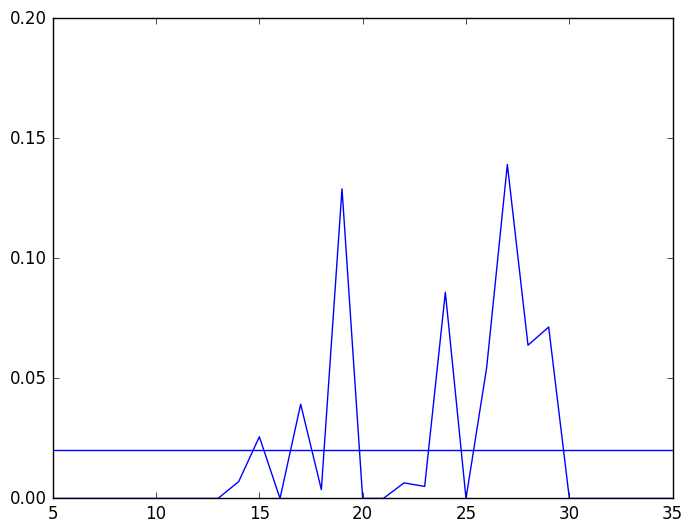

(0.0,0.2)

In [16]:
_range = 5:35

plot(_range,distr[_range])
axhline(y_desired)
ylim([0,10*y_desired])

In [49]:
for i in 1:length(by_degree_stats)
    stat = by_degree_stats[i]
    if 0.2 < stat.overall < 0.23
        println(stat.by_degree[1:20])
    end
end

Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0]
Real[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
type ByDegreeStatistic
    overall::Real
    by_degree::Array{Real,1}
    instances::Array{Int,1}
end

function get_neighbor_fractions_of_type{P}(g::LightGraphs.Graph,payload::Array{P,1})
    p = PayloadGraph.Graph(g,payload)
    fractions = 1.0*zeros(payload)
    for i = 1:length(fractions)
        fractions[i] = get_neighbor_fraction_of_type(p,i,1)
    end
    fraction = get_fraction_of_type(p,1)
    return fractions,fraction
end

function get_overall_fraction_of_type{P}(g::LightGraphs.Graph,payload::Array{P,1})
    p = PayloadGraph.Graph(g,payload)
    fraction = get_fraction_of_type(p,1)
    return fraction
end



function get_by_degree_y_statistics(runs::Array{EpidemicRun,1})
    by_degree_statistics = Array(ByDegreeStatistic,0)
    for run in runs
        g = run.graph_information.graph
        N = length(run.infecteds_by_nodes_vs_time[1])
        for t in 1:length(run.infecteds_by_nodes_vs_time) 
            fractions_by_degrees = zeros(N-1)
            instances_by_degrees = zeros(N-1)
            infecteds_by_nodes = run.infecteds_by_nodes_vs_time[t]
            y_overall = get_overall_fraction_of_type(g,infecteds_by_nodes)
            degrees = LightGraphs.degree(g)
            for i in length(degrees)
                fractions_by_degrees[degrees[i]] += infecteds_by_nodes[i]
                instances_by_degrees[degrees[i]] += 1
            end
            stat = ByDegreeStatistic(y_overall,fractions_by_degrees,instances_by_degrees)
            push!(by_degree_statistics,stat)
        end
    end
    by_degree_statistics
end


function get_by_degree_statistics(runs::Array{EpidemicRun,1})
    by_degree_statistics = Array(ByDegreeStatistic,0)
    for run in runs
        g = run.graph_information.graph
        N = length(run.infecteds_by_nodes_vs_time[1])
        for t in 1:length(run.infecteds_by_nodes_vs_time) 
            fractions_by_degrees = zeros(N-1)
            instances_by_degrees = zeros(N-1)
            infecteds_by_nodes = run.infecteds_by_nodes_vs_time[t]
            fractions,y_overall = get_neighbor_fractions_of_type(g,infecteds_by_nodes)
            degrees = LightGraphs.degree(g)
            for i in length(degrees)
                fractions_by_degrees[degrees[i]] = fractions[i]
                instances_by_degrees[degrees[i]] += 1
            end
            stat = ByDegreeStatistic(y_overall,fractions_by_degrees,instances_by_degrees)
            push!(by_degree_statistics,stat)
        end
    end
    by_degree_statistics
end


function get_mean_distribution_from_stats(by_degree_stats::Array{ByDegreeStatistic,1},y_desired::AbstractFloat,tol= 0.005)
    stats = by_degree_stats[1]
    accum = zeros(stats.by_degree)
    counter = zeros(stats.instances)
    num = 0
    for stat in by_degree_stats 
        if y_desired-tol< stat.overall < y_desired+tol
            num += 1
            accum += stat.by_degree
            counter += stat.instances
        end
    end
    accum = accum ./ counter
    accum[counter .== 0] = 0.0
    println("$num instances")
    return accum
end



get_mean_distribution_from_stats (generic function with 2 methods)